In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Gather data

df_raw = pd.read_csv('MoviesData.csv')
df_raw.head(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## The questions about this dataset:
***
***Correlations***

1) Does higher budget mean higher revenue?

2) Do higher votes means higher revenue?

3) Does the runtime affect the revenue?

***Other Questions***

4) How many movies in the dataset, and from which year?

5) Which movie has the highest revenue?

6) Which movie has the highest revenue by year?

7) Which movie genre was most produced by year?



## Cleaning the data
***

In [4]:
# Drop unuseful columns
df_raw.drop(['imdb_id', 'homepage','overview','tagline','budget_adj','revenue_adj'],axis=1,inplace=True)

In [5]:
# Check results
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   keywords              9373 non-null   object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
dtypes: float64(2), int6

In [6]:
df_raw.shape

(10866, 15)

In [7]:
# Check for null values
df_raw.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [8]:
# Drop null values
df_raw.dropna(inplace=True)

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8667 non-null   int64  
 1   popularity            8667 non-null   float64
 2   budget                8667 non-null   int64  
 3   revenue               8667 non-null   int64  
 4   original_title        8667 non-null   object 
 5   cast                  8667 non-null   object 
 6   director              8667 non-null   object 
 7   keywords              8667 non-null   object 
 8   runtime               8667 non-null   int64  
 9   genres                8667 non-null   object 
 10  production_companies  8667 non-null   object 
 11  release_date          8667 non-null   object 
 12  vote_count            8667 non-null   int64  
 13  vote_average          8667 non-null   float64
 14  release_year          8667 non-null   int64  
dtypes: float64(2), int64

In [10]:
# Check for zeros
df_raw.all(axis=0)

id                       True
popularity               True
budget                  False
revenue                 False
original_title           True
cast                     True
director                 True
keywords                 True
runtime                 False
genres                   True
production_companies     True
release_date             True
vote_count               True
vote_average             True
release_year             True
dtype: bool

In [12]:
# Calculate % zeros missing 
budget_zeros = df_raw[df_raw['budget'] == 0].count()[0]/len(df_raw.budget)*100
budget_zeros

45.45979000807661

In [13]:
revenue_zeros = df_raw[df_raw['revenue'] == 0].count()[0]/len(df_raw.revenue)*100
revenue_zeros

47.65201338410061

In [14]:
runtime_zeros = df_raw[df_raw['runtime'] == 0].count()[0]/len(df_raw.runtime)*100
runtime_zeros

0.08076612437983154

In [15]:
# Replacing zeros with the mean for 'runtime' column
df_raw['runtime']=df_raw['runtime'].replace(0,df_raw['runtime'].mean())

In [16]:
# Looking for duplicates
df_raw.duplicated().sum()

1

In [17]:
# Drop duplicates
df_raw.drop_duplicates(inplace=True)
df_raw.duplicated().sum()

0

In [18]:
# Sort the data
df_raw = df_raw.sort_values(by=['revenue'],ascending = False)

In [19]:
# Create a copy of the dataframe
df = df_raw.copy()
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.1,2009
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/1997,4654,7.3,1997
4361,24428,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,143.0,Science Fiction|Action|Adventure,Marvel Studios,4/25/2012,8903,7.3,2012
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015


### **QUESTION 1**
Does higher budget mean higher revenue?
***

In [20]:
# Looking at correlation

df.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,0.030781,-0.116645,-0.079774,-0.086912,-0.005837,-0.070987,0.495262
popularity,0.030781,1.000000,0.533160,0.659153,0.164436,0.801427,0.244908,0.137028
budget,-0.116645,0.533160,1.000000,0.729344,0.227777,0.624897,0.089760,0.170165
revenue,-0.079774,0.659153,0.729344,1.000000,0.195133,0.786644,0.194378,0.095512
runtime,-0.086912,0.164436,0.227777,0.195133,1.000000,0.197100,0.202469,-0.125484
vote_count,-0.005837,0.801427,0.624897,0.786644,0.197100,1.000000,0.288350,0.149792
vote_average,-0.070987,0.244908,0.089760,0.194378,0.202469,0.288350,1.000000,-0.124069
release_year,0.495262,0.137028,0.170165,0.095512,-0.125484,0.149792,-0.124069,1.000000


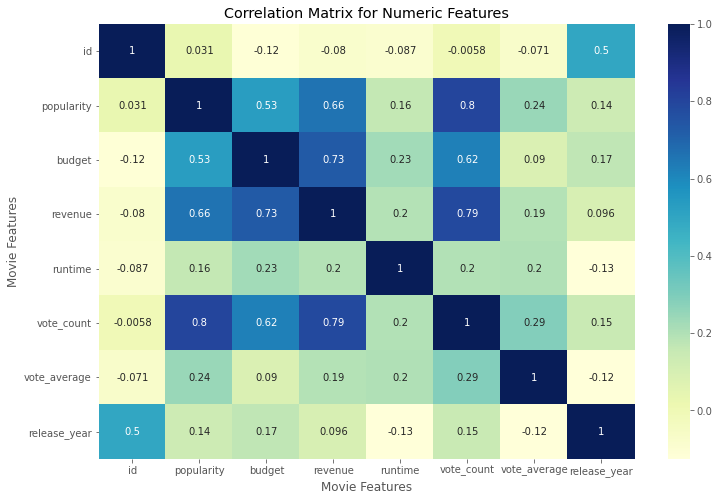

In [22]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True,cmap='YlGnBu')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='revenue'>

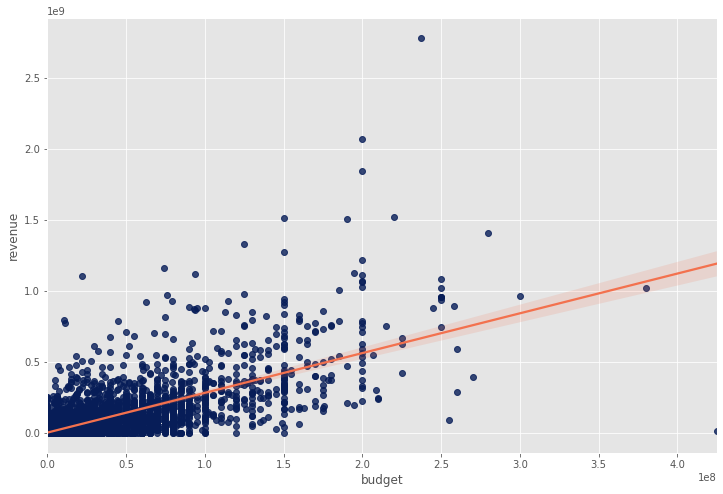

In [25]:
# Budget vs Revenue with scatter plot

sns.regplot(x='budget',y='revenue',data=df,scatter_kws={"color": "#071D58"}, line_kws={"color": "#F3714E"})

### Answer for question 1

From the above plots we can conclude that there is a strong relationship between budget and revenue. 

***
### **QUESTION 2**
Do higher votes mean higher revenue?
***

<AxesSubplot:xlabel='vote_count', ylabel='revenue'>

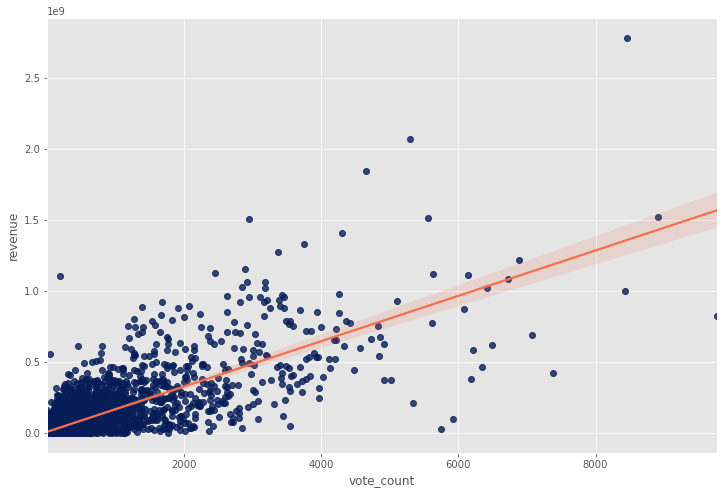

In [27]:
# Vote count vs Revenue with scatter plot

sns.regplot(x='vote_count',y='revenue',data=df,scatter_kws={"color": "#071D58"}, line_kws={"color": "#F3714E"})

In [39]:
# Creating a bar chart to compare revenue between movies with lower vote count and movies with higher vote count

med = df['vote_count'].median()
less_votes = df.query('vote_count < {}'.format(med))
more_votes = df.query('vote_count > {}'.format(med))
mean_less_votes = less_votes['revenue'].mean()
mean_more_votes = more_votes['revenue'].mean()

Text(0, 0.5, 'Revenue')

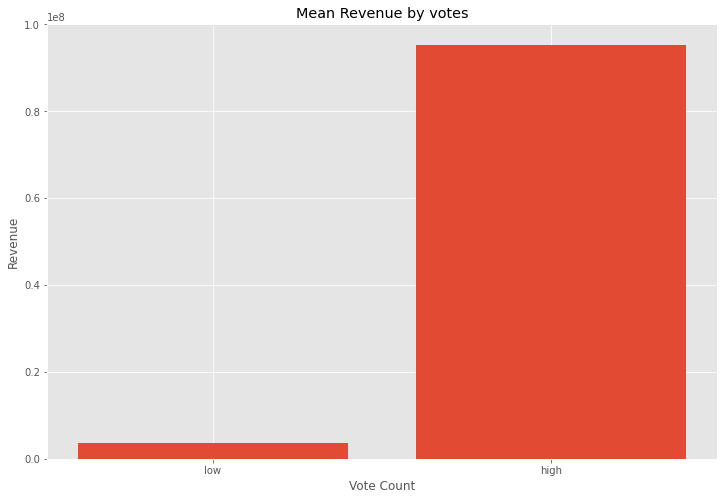

In [36]:
locations = [1,2]
heights = [mean_less_votes,mean_more_votes]
labels = ['low','high']
plt.bar(locations,heights,tick_label = labels)
plt.title('Mean Revenue by votes')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')

### Answer for question 2

From the above plots we can conclude that there is a strong relationship between vote count and revenue. 

***
### **QUESTION 3**
Does the runtime affect the revenue?
***

<AxesSubplot:xlabel='runtime', ylabel='revenue'>

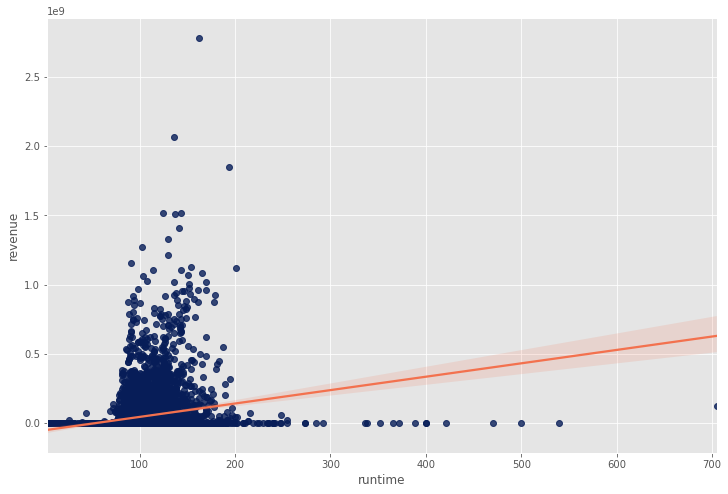

In [41]:
# Runtime vs Revenue with a scatter plot

sns.regplot(x='runtime',y='revenue',data=df,scatter_kws={"color": "#071D58"}, line_kws={"color": "#F3714E"})

### Answer for question 3

From the above plot we can simply conclude that movies with a runtime within 200 minutes, are more popular and generate more revenue.

***
### **QUESTION 4**
How many movies in the dataset, and from which year?
***

In [114]:
# Count movies in dataset

print('There are :',df['original_title'].count(),'movies in this dataset')

There are : 8666 movies in this dataset


<AxesSubplot:xlabel='release_year', ylabel='Count'>

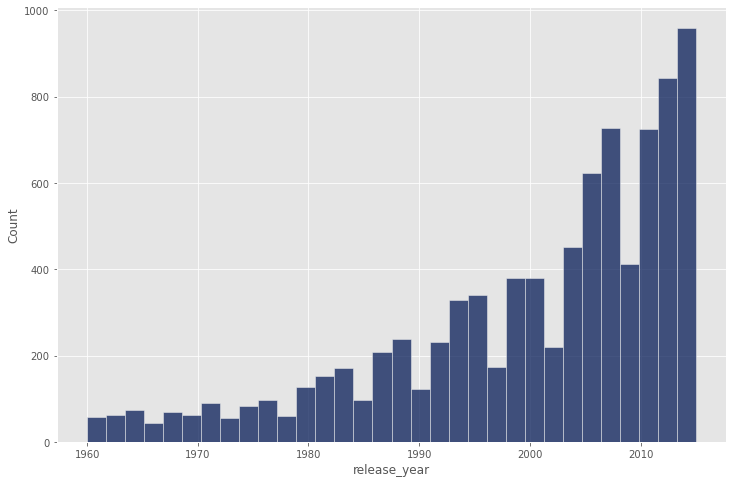

In [94]:
# Creating a histogram to display how many movies were produced each year

sns.histplot(data=df,x='release_year',color="#071D58")

### Answer for question 4

There are 8666 movies in this dataset and the total number of films produced each year is increasing year over year

***
### **QUESTION 5**
Which movie has the highest revenue?
***

In [115]:
# Movie with the highest revenue

print('The movie with the highest revenue is:',df.original_title[df.revenue == df.revenue.max()].values[0])

The movie with the highest revenue is: Avatar


/Users/mattiacostola/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revenue', ylabel='original_title'>

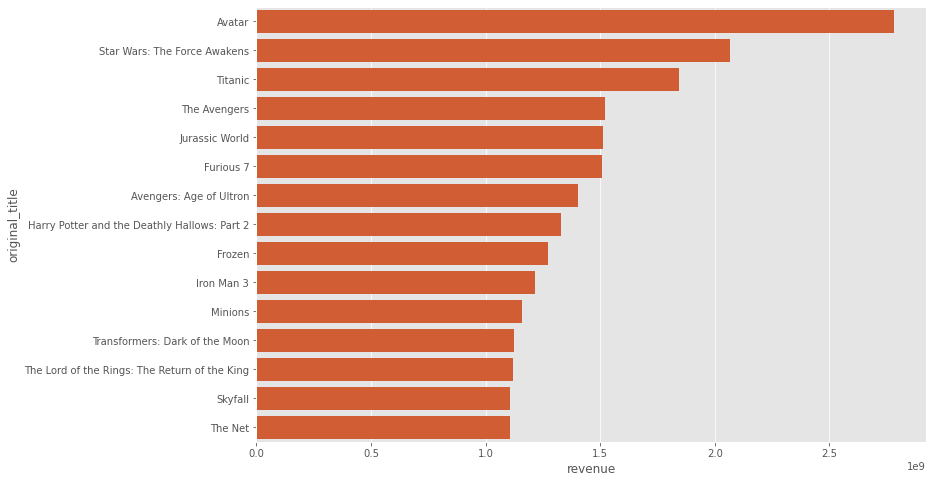

In [105]:
# Creating a barchar to compare the revenue between the top 15 movies with higher revenue

df_top15 = df[0:15].copy()
sns.barplot(df_top15.revenue,df_top15.original_title,color='#ea5119')

### Answer for question 5

The movies with the highest revenue in order are: Avatar, Star Wars: The Force Awakens and Titanic

***
### **QUESTION 6**
Which movie has the highest revenue by year?
***

In [116]:
# Creating a histogram to display w were produced each year



In [134]:
year_list = np.array(df['release_year'])
year_list = np.unique(year_list)

In [135]:
movie_name=[]
grouped  = df.groupby('release_year')
for year in year_list:
    value = grouped.get_group(year).popularity.max()
    movie_name.append(df.original_title[(df['popularity']==value)  & (df['release_year']==year)].values[0]) 

df1 =  pd.DataFrame({'Year':year_list,
                     'Movie_Name':movie_name})
df1   

,Year,Movie_Name
0,1960,Psycho
1,1961,One Hundred and One Dalmatians
2,1962,Dr. No
3,1963,From Russia With Love
4,1964,Goldfinger
5,1965,Thunderball
6,1966,How the Grinch Stole Christmas!
7,1967,The Jungle Book
8,1968,2001: A Space Odyssey
9,1969,On Her Majesty's Secret Service


***
### **QUESTION 7**
Which movie genre was most produced by year?
***


In [139]:
# Creating a list of genres

genres_list = np.array(df['genres'].str.split('|'))
genres_list = np.hstack(genres_list)
genres_list = np.unique(genres_list)
genres_list

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype='<U15')

In [150]:
# Creating a table with the most popular movie genre by year

max_genres = []
max_count = []

for year in year_list:
    genres_max = 0
    for genres in genres_list:
        genres_count = 0
        genres_count = df[ (df['genres'].str.contains(genres)) & (df['release_year']==year)]
        genres_count=genres_count.count()[0]
        
        if genres_max < genres_count:
            genres_max = genres_count
            genres_type = genres
            
    max_genres.append(genres_type)
    max_count.append(genres_max)

df_geners =  pd.DataFrame({'Year':year_list,
                           'Geners':max_genres,
                           'movies_number':max_count})
df_geners     
        

,Year,Geners,movies_number
0,1960,Drama,12
1,1961,Drama,16
2,1962,Drama,19
3,1963,Comedy,13
4,1964,Drama,20
5,1965,Drama,18
6,1966,Comedy,15
7,1967,Comedy,15
8,1968,Drama,19
9,1969,Drama,12


### Conclusion

- there is a strong relationship between budget and revenue
- there is a strong relationship between vote count and revenue
- movies with a runtime within 200 minutes are more popular and generate more revenue
- Avatar, Star Wars: The Force Awakens, and Titanic are the movies with the highest revenue
- Drama and Comedy are the most popular genre

### Limitations

- the dataset contains a lot of missing data and zeros which affects the data analysis process

